In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import radians,cos,sin,asin,sqrt

!pip install folium

import folium
from folium.plugins import HeatMap

import datetime
from scipy.stats import ttest_ind

import matplotlib
matplotlib.rcParams.update({'font.size': 12})



In [7]:
uber_data = pd.read_csv(r"C:\Users\HP\Downloads\uber-raw-data-jul14.csv")

In [8]:
uber_data.head(10)

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512
5,7/1/2014 0:35:00,40.7487,-73.9869,B02512
6,7/1/2014 0:57:00,40.7444,-73.9961,B02512
7,7/1/2014 0:58:00,40.7132,-73.9492,B02512
8,7/1/2014 1:04:00,40.7590,-73.9730,B02512
9,7/1/2014 1:08:00,40.7601,-73.9823,B02512


In [9]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  796121 non-null  object 
 1   Lat        796121 non-null  float64
 2   Lon        796121 non-null  float64
 3   Base       796121 non-null  object 
dtypes: float64(2), object(2)
memory usage: 24.3+ MB


In [10]:
uber_data["Date/Time"]= pd.to_datetime(uber_data["Date/Time"]) #converting datetime column to pandas datetime obj

In [ ]:
print(type(uber_data.loc[0,"Date/Time"]))

In [ ]:
print(type(uber_data.loc[0,'Date/Time']))

In [12]:
# Create a new column to store this new binned column
uber_data['BinnedHour'] = uber_data['Date/Time'].dt.floor('15min')

In [13]:
# Printing the new column - BinnedHour
display(uber_data['BinnedHour'])

0        2014-07-01 00:00:00
1        2014-07-01 00:00:00
2        2014-07-01 00:00:00
3        2014-07-01 00:00:00
4        2014-07-01 00:15:00
                 ...        
796116   2014-07-31 23:15:00
796117   2014-07-31 23:15:00
796118   2014-07-31 23:15:00
796119   2014-07-31 23:30:00
796120   2014-07-31 23:45:00
Name: BinnedHour, Length: 796121, dtype: datetime64[ns]

In [14]:
display(uber_data)

,Date/Time,Lat,Lon,Base,BinnedHour
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,2014-07-01 00:00:00
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,2014-07-01 00:00:00
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,2014-07-01 00:00:00
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,2014-07-01 00:00:00
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,2014-07-01 00:15:00
...,...,...,...,...,...
796116,2014-07-31 23:22:00,40.7285,-73.9846,B02764,2014-07-31 23:15:00
796117,2014-07-31 23:23:00,40.7615,-73.9868,B02764,2014-07-31 23:15:00
796118,2014-07-31 23:29:00,40.6770,-73.9515,B02764,2014-07-31 23:15:00
796119,2014-07-31 23:30:00,40.7225,-74.0038,B02764,2014-07-31 23:30:00


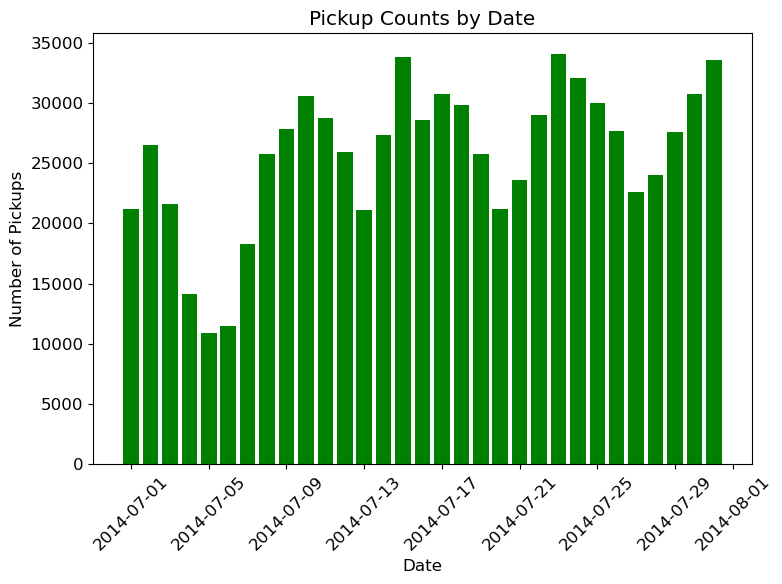

In [23]:
#### Q1. On what date did we see the most number of Uber pickups?

pickup_counts= uber_data.groupby(uber_data['Date/Time'].dt.date).size()
highest_pickups = pickup_counts.max()

date_with_highest_pickups = pickup_counts.idxmax()


plt.figure(figsize=(8, 6))
plt.bar(pickup_counts.index, pickup_counts.values, color = 'green')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.title('Pickup Counts by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
print(f"Date with the highest number of pickups: {date_with_highest_pickups} (Pickups: {highest_pickups})")


Date with the highest number of pickups: 2014-07-23 (Pickups: 34073)


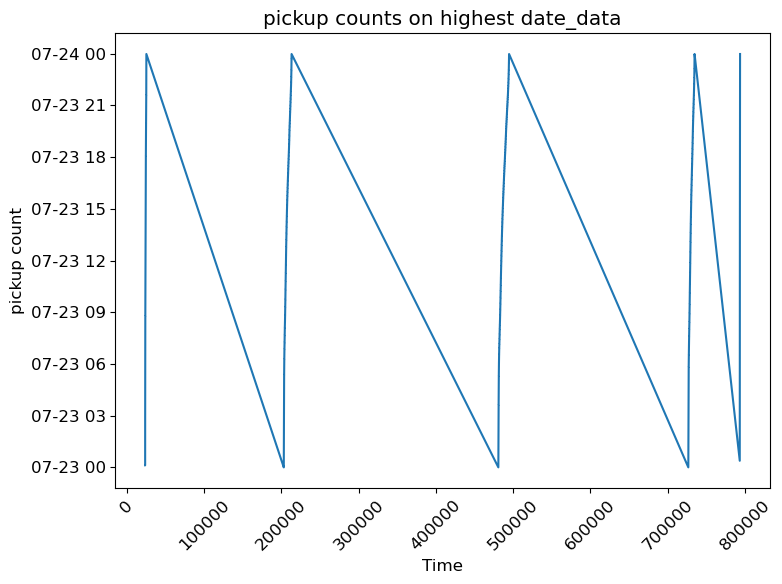

Count of pickups on the highest date (2014-07-23): 34073


In [30]:
#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

pickup_counts = uber_data.groupby(uber_data["Date/Time"].dt.date).size()
highest_no_of_pickups = pickup_counts.max()
date_with_highest_pickups = pickup_counts.idxmax()

highest_date_data = uber_data[uber_data["Date/Time"].dt.date == date_with_highest_pickups]

plt.figure(figsize=(8,6))
plt.xlabel('Time')
plt.ylabel("pickup count")
plt.plot(highest_date_data["Date/Time"]),range(len(highest_date_data))
plt.title("pickup counts on highest date_data")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Count of pickups on the highest date ({date_with_highest_pickups}): {highest_pickups}")

 Number of Unique TLCBase Comapnies: 5


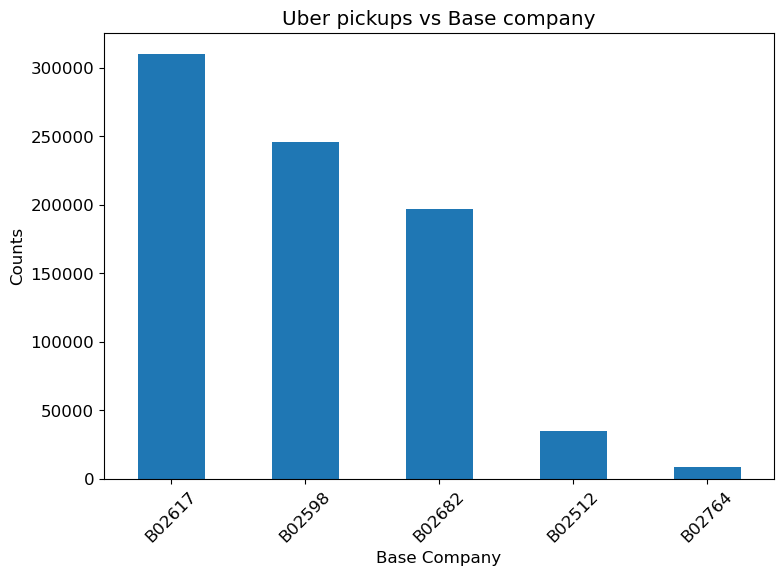

In [50]:
#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?


unique_TLCbase_companies = uber_data["Base"].nunique()

print(" Number of Unique TLCBase Comapnies:", unique_TLCbase_companies)

plt.figure(figsize=(8,6))
uber_data['Base'].value_counts().plot(kind='bar')
plt.xlabel("Base Company")
plt.ylabel("Counts")
plt.title("Uber pickups vs Base company")
plt.tight_layout()
plt.xticks(rotation= 45)
plt.show()


highest TLC base company: B02617
TLC Base with highest pickup counts: 34073


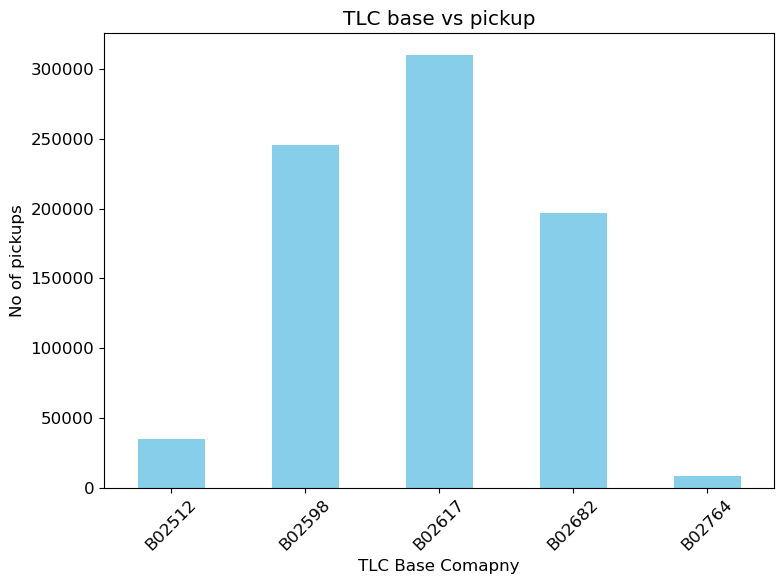

In [77]:
#### Q.4 Which TLC base company had the highest number of pickups?

#highest pickup counts
pickup_counts = uber_data.groupby(uber_data["Date/Time"].dt.date).size()
highest_no_of_pickups = pickup_counts.max()

#groupby base company
base_counts = uber_data.groupby("Base").size()  #uber_data['Base'].value_counts() can write in this way#
highest_TLCbase_company = base_counts.idxmax()

print("highest TLC base company:", highest_TLCbase_company)
print("TLC Base with highest pickup counts:", highest_no_of_pickups)


plt.figure(figsize=(8,6))
base_counts.plot(kind="bar", color= "skyblue")
plt.xlabel("TLC Base Comapny")
plt.ylabel("No of pickups")
plt.title("TLC base vs pickup")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Base
B02512     35021
B02598    245597
B02617    310160
B02682    196754
B02764      8589
dtype: int64
Date/Time
2014-07-01    21228
2014-07-02    26480
2014-07-03    21597
2014-07-04    14148
2014-07-05    10890
2014-07-06    11443
2014-07-07    18280
2014-07-08    25763
2014-07-09    27817
2014-07-10    30541
2014-07-11    28752
2014-07-12    25936
2014-07-13    21082
2014-07-14    27350
2014-07-15    33845
2014-07-16    28607
2014-07-17    30710
2014-07-18    29860
2014-07-19    25726
2014-07-20    21212
2014-07-21    23578
2014-07-22    29029
2014-07-23    34073
2014-07-24    32050
2014-07-25    29975
2014-07-26    27708
2014-07-27    22590
2014-07-28    23981
2014-07-29    27589
2014-07-30    30740
2014-07-31    33541
dtype: int64


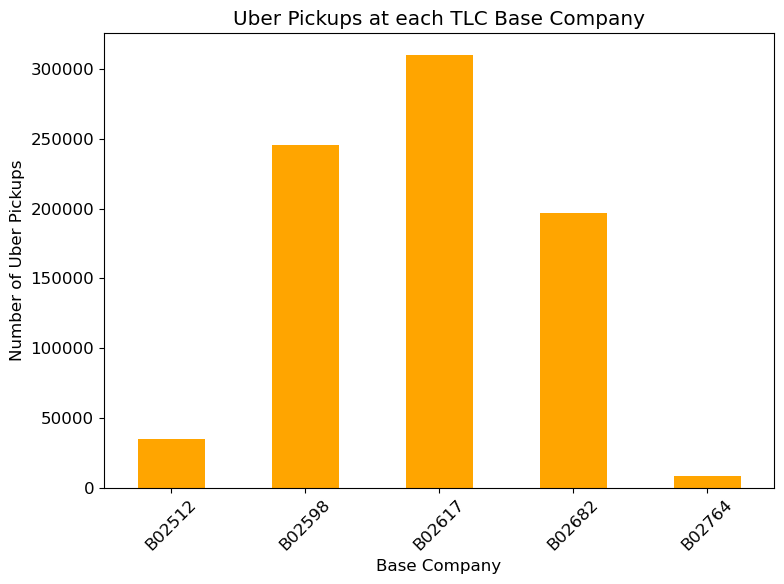

In [67]:
#### Q.5 How many Uber pickups were made at each unique TLC base company?

#pickup counts
pickup_counts = uber_data.groupby(uber_data["Date/Time"].dt.date).size()

#group by TLC Base
base_company_counts = uber_data.groupby("Base").size()
print(base_company_counts)
print(pickup_counts)


plt.figure(figsize=(8,6))
base_company_counts.plot(kind="bar", color= "orange")
plt.xlabel('Base Company')
plt.ylabel('Number of Uber Pickups')
plt.title('Uber Pickups at each TLC Base Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Number of uber pickups for each hour of the day: hour
0     17953
1     11527
2      8562
3      9199
4     10040
5     14932
6     23456
7     32545
8     33387
9     28486
10    28558
11    30120
12    30900
13    35832
14    41357
15    46053
16    52403
17    58260
18    57268
19    52332
20    51859
21    49528
22    42218
23    29346
dtype: int64
Busiest time of the day in hours: 17


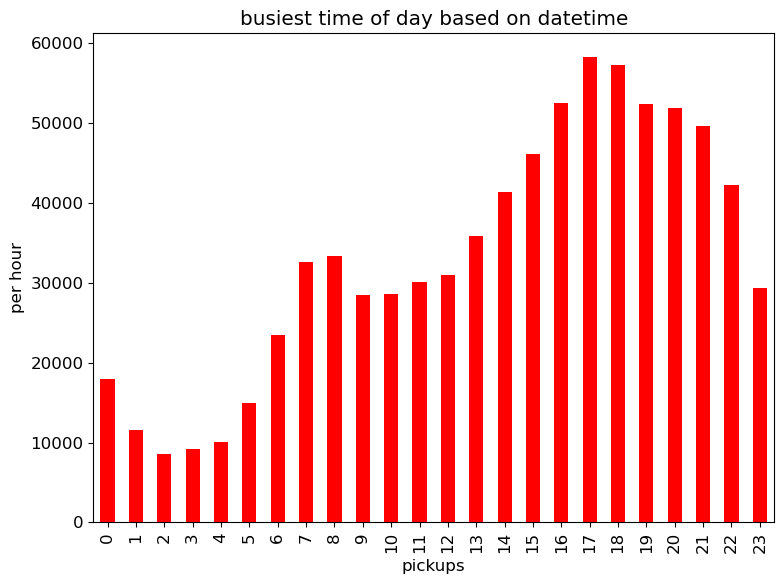

In [74]:
#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

#extracting the hour from datetime
uber_data['hour'] = uber_data['Date/Time'].dt.hour

#group by hour and count by size() 0 to 23 index denotes the hours (23hrs)
hourly_pickups = uber_data.groupby('hour').size()

print("Number of uber pickups for each hour of the day:" ,hourly_pickups)

#find the hour with highest no of pickup
busiest_time = hourly_pickups.idxmax()

print("Busiest time of the day in hours:", busiest_time)

plt.figure(figsize=(8,6))
hourly_pickups.plot(kind="bar", color="red")
plt.xlabel("pickups")
plt.ylabel("per hour")
plt.title("busiest time of day based on datetime")
plt.tight_layout()
plt.show()

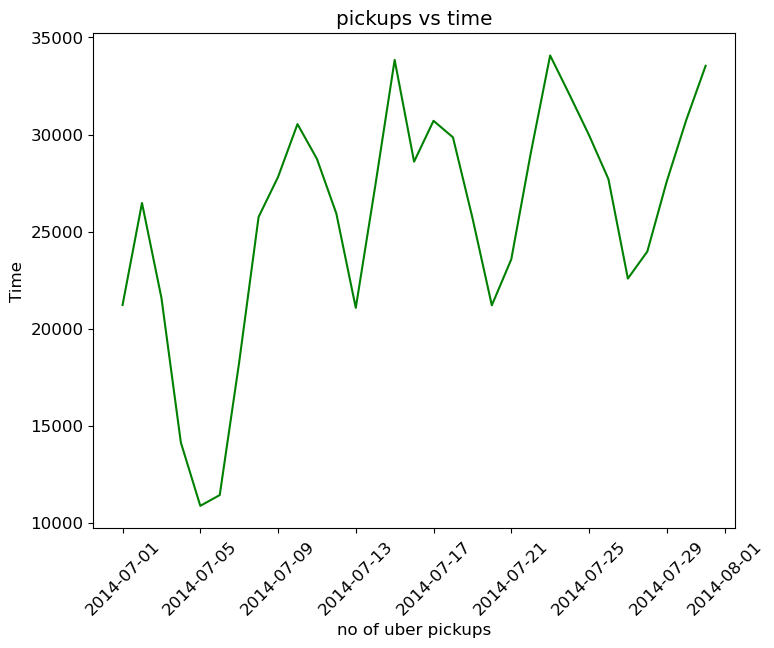

In [82]:
#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?


import matplotlib.pyplot as plt

#Group by date and count the number of pickups
pickups_count = uber_data.groupby(uber_data["Date/Time"].dt.date).size()

plt.figure(figsize=(8,6))
pickups_count.plot(kind="line", color = "green")
plt.xlabel("no of uber pickups")
plt.ylabel("Time")
plt.title("pickups vs time")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



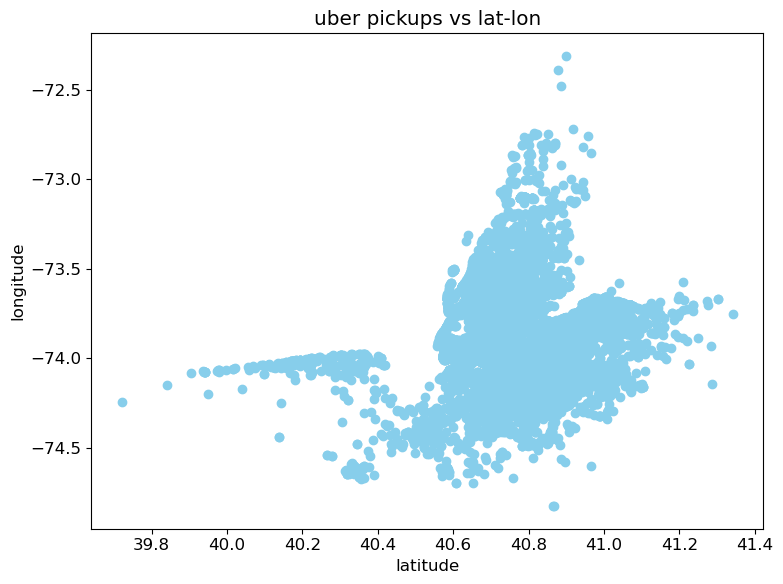

In [86]:
#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

pickup_count = uber_data.groupby(uber_data["Date/Time"].dt.date).size()

#extracting lat and Lon from dataframe
LAT= uber_data["Lat"]
LON= uber_data["Lon"]

#plotting
plt.figure(figsize=(8,6))
plt.scatter(LAT,LON, color="skyblue")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("uber pickups vs lat-lon")
plt.tight_layout()
plt.show()


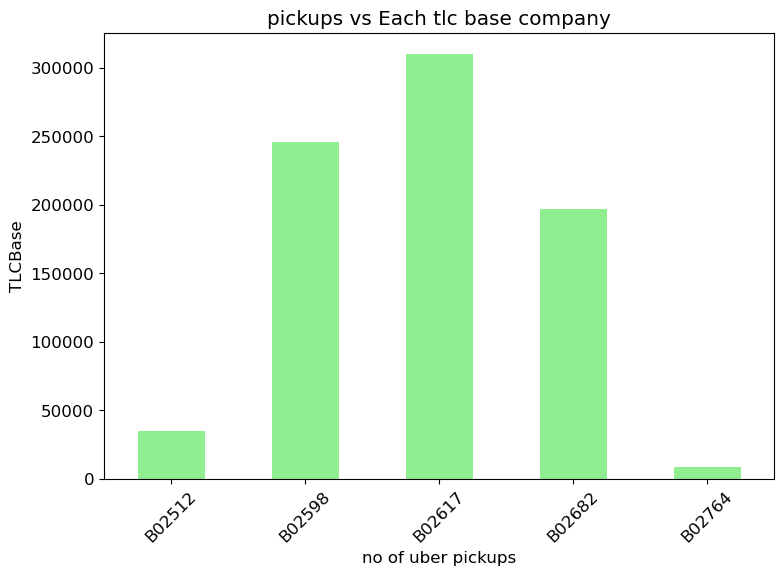

In [93]:
#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

pickup_count = uber_data.groupby(uber_data["Date/Time"].dt.date).size()

TLCbase_company = uber_data.groupby("Base").size()

plt.figure(figsize=(8,6))
TLCbase_company.plot(kind="bar", color = "lightgreen")
plt.xlabel("no of uber pickups")
plt.ylabel("TLCBase")
plt.title("pickups vs Each tlc base company")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()




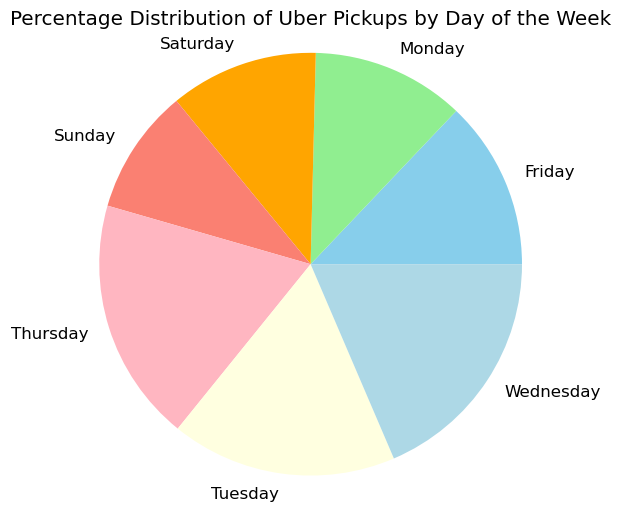

In [102]:
#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

pickup_count = uber_data.groupby(uber_data["Date/Time"].dt.date).size()


#extracting day from datatime 
uber_data["Day"]= uber_data["Date/Time"].dt.day_name()

# Group by day of the week and count the number of pickups
daily_pickups = uber_data.groupby("Day").size()


plt.figure(figsize=(6, 6))
plt.pie(daily_pickups,labels=daily_pickups.index, colors=['skyblue', 'lightgreen', 'orange', 'salmon', 'lightpink', 'lightyellow', 'lightblue'])
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()